In [1]:
import networkx as nx
from presolver import Presolver
import highspy
import matplotlib.pyplot as plt

In [2]:
def node_label(node) -> str:
    if node[1].is_conv():
        return f"{node[1].name} = {node[1].upper}"
    else:
        return f"{node[1].lower}≤{node[1].name}≤{node[1].upper}"

def node_color(node, origins, drains):
    if node in origins:
        return "green"
    elif node in drains:
        return "red"
    elif node[1].is_conv():
        return "blue"
    elif node[1].general:
        return "yellow"
    return "magenta"

In [26]:
# -x1 - x2 - x3 + x5 + x6 + x7 >= -3

'''
x1 = 1
x3 = 1
x6 = 0

binary
x1
x2
x3
x4
x5
x6
x7
general
z1
z2
z3
z4
z5
'''

h = highspy.Highs()
h.readModel("test2.lp")
h.silent()

h.run()
print(h.getInfo().objective_function_value)

Running HiGHS 1.10.0 (git hash: fd86653): Copyright (c) 2025 HiGHS under MIT licence terms
-1.0


In [9]:
#path = "test.lp"
path = "test2.lp"
#path = "supportcase16.mps"
#path = "supportcase1.mps"
h = highspy.Highs()
h.readModel(path)
h.silent()

presolver = Presolver(h)
presolver.update_n_times(10)
#print(presolver)

False

Running HiGHS 1.10.0 (git hash: fd86653): Copyright (c) 2025 HiGHS under MIT licence terms


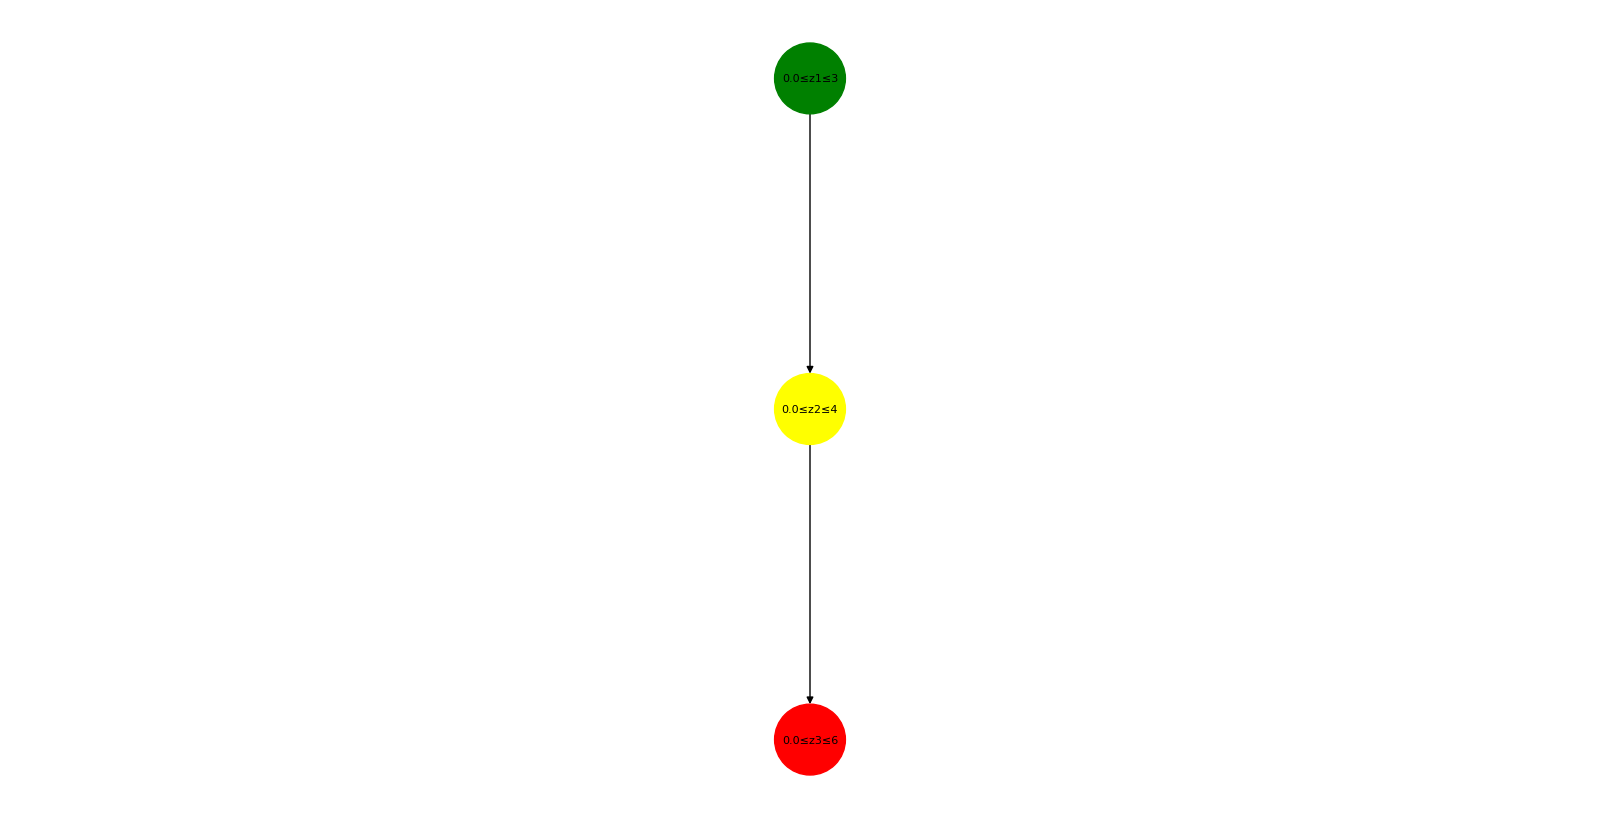

In [10]:
nodes, edges, origins, drains = presolver.graph.for_plot()

G = nx.DiGraph()
for edge in edges:
    #print(edge)
    G.add_edge(node_label(edge[0]), node_label(edge[1]))

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

plt.figure(3,figsize=(16,8)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        node_color=[node_color(n, origins, drains) for n in nodes]
       )